# Employment in California: An analysis on the trends of employment and wages


---





In this project we will explore the Quarterly Census of Employment and Wages (QCEW) Program and current employment rate of California, USA. The goal is to predict level of employment and wages across different ownerships/sector.

## GOAL
Our aim in this project is to determine which industries in California have promoted most economic growth in terms of employment over time. From this, we will consider the changes in average weekly wages over time from 2004 to 2021. We can expand on this by considering any significant difference in wages between a public sector and a private sector employee.In this project 
The Quarterly Census of Employment and Wages (QCEW) Program and current employment rate of California, USA. The goal is to predict variation in wage across various sector.

## Datasets/Source
##### Quarterly_Census_of_Employment_and_Wages__QCEW_
       https://data.edd.ca.gov/d/fisq-v939
##### Current_Employment_Statistics__CES_
      https://data.edd.ca.gov/d/r4zm-kdcg

## Overview
* Understanding the shape of the data
* Data exploration
* Data cleaning
* Prediciting the trend of salary
* Trends in Employment levels and wages since 2004 in Californa
* Potential of Employment based on Ownership Structure in California.
* Clustering: Employment and average salary according to different areas within California for the most recent year
* Conclusion

In [ ]:
# importing modules

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
from numpy import cov
import warnings
warnings.filterwarnings('ignore')

In [ ]:
qcew = pd.read_csv('files/Quarterly_Census_of_Employment_and_Wages__QCEW_.csv')
ces = pd.read_csv('files/Current_Employment_Statistics__CES_.csv')

## Data Exploration

In [ ]:
print("Quaterly census has ",qcew.shape[0],"rows and ",qcew.shape[1],"columns.")
print("Current Employment statistics dataset has ",ces.shape[0],"rows and ",ces.shape[1],"columns.")

Quaterly census has  500000 rows and  16 columns.
Current Employment statistics dataset has  10000 rows and  10 columns.


For the purpose of our project in analysing wages and employment in California, we will filter out the two datasets for only California. 
We will now use ca_qcew and ca_ces as the two datasets for further analysis

In [ ]:
ca_qcew = qcew[qcew['Area Type'] == 'California - Statewide']
ca_ces = ces.loc[(ces['Area Type'] == 'State') & (ces['Year'] >= 2004)].sort_values(by=['Year','Date'])
print('ca_qcew shape:', ca_qcew.shape)
print('ca_ces shape:', ca_ces.shape)

ca_qcew shape: (28547, 16)
ca_ces shape: (533, 10)


### Data Cleaning

Since the Null values for NAICS level in ca_qcew dataset constitue only 1.1% of the whole dataset, we can drop these values

In [ ]:
ca_qcew = ca_qcew.dropna(axis=0, how='any')
print('ca_ces shape:', ca_qcew.shape)

ca_ces shape: (28547, 16)


In [ ]:
ca_qcew.head(3)

,Unnamed: 0,Area Type,Area Name,Year,Quarter,Ownership,NAICS Level,NAICS Code,Industry Name,Establishments,Average Monthly Employment,1st Month Emp,2nd Month Emp,3rd Month Emp,Total Wages (All Workers),Average Weekly Wages
3064,3064,California - Statewide,California,2004,1st Qtr,Local Government,5.0,92613,Utility Regulation and Administration,30,4079,4064,4090,4084,56559335.0,1067.0
3065,3065,California - Statewide,California,2004,1st Qtr,Private,6.0,311320,"Confectionery Manufacturing, Cacao Beans",14,1645,1718,1643,1574,16161440.0,756.0
3066,3066,California - Statewide,California,2004,1st Qtr,Private,6.0,327121,Brick and Structural Clay Tile Mfg,5,185,178,186,191,1720921.0,716.0


Observing different industries in the two datasets

In [ ]:
 ca_grp = ca_ces.groupby(['Industry Title'])
 ca_df = ca_grp.apply(lambda x: x) 
 ca_df.head(3)

,Unnamed: 0,Area Type,Area Name,Year,Month,Date,Series Code,Industry Title,Seasonally Adjusted,Current Employment
3552,3552,State,California,2004,January,01/01/2004,55520000,Finance and Insurance,Y,613500
3553,3553,State,California,2004,January,01/01/2004,31339900,Other Miscellaneous Durable Goods Mfg.,N,40300
3578,3578,State,California,2004,February,02/01/2004,43220000,Utilities,N,56400


We will filter both datasets to analyse wages and employment only  in California as our area of interest

In [ ]:
ca_qcew = qcew[qcew['Area Type'] == 'California - Statewide']
ca_ces = ces[ces['Area Type'] == 'State']


In [ ]:
# We need to only have industry names for each dataset and not any totals
ca_ces.loc[ca_ces['Industry Title']=="Total Wage and Salary"]
ca_ces_raw = ca_ces[~ca_ces['Industry Title'].str.startswith(('Total'))]
ca_qcew_raw = ca_qcew[~ca_qcew['Industry Name'].str.startswith(('Total'))]
ca_ces_raw.shape

(804, 10)

In [ ]:
# Exmaining the top 5 and bottom 2 perfomring industries for generating employment from a broad perspectove
avg_employment_sector = ca_qcew_raw.groupby(['Industry Name','Ownership'])['Average Monthly Employment'].agg(['mean', 'min', 'max']).reset_index().sort_values(by=['mean'],ascending = False)
avg_employment_sector_top = avg_employment_sector.head(5)
avg_employment_sector_top = avg_employment_sector_top.append(avg_employment_sector.tail(2))
avg_employment_sector_top

,Industry Name,Ownership,mean,min,max
1787,Service-Providing,Private,9965825.5,9671743,10286248
740,Goods-Producing,Private,2778135.1,2622024,2906205
1964,"Trade, Transportation, and Utilities",Private,2759970.1,2674120,2885204
1607,Professional and Business Services,Private,2110043.3,2027383,2185832
1786,Service-Providing,Local Government,1648200.3,1501142,1715081
1325,Other Health and Personal Care Stores,Local Government,0.0,0,0
1662,Real Estate and Rental and Leasing,Federal Government,0.0,0,0


In [ ]:
# Examining above information for specific industry names
avg_employment = ca_qcew_raw.groupby(['Industry Name','Ownership','NAICS Level'])['Average Monthly Employment'].agg(['mean', 'min', 'max']).reset_index().sort_values(by=['NAICS Level','mean'],ascending = False)
avg_employment_top = avg_employment.head(5)
avg_employment_top = avg_employment_top.append(avg_employment.tail(2))
avg_employment_top

,Industry Name,Ownership,NAICS Level,mean,min,max
779,Elementary and Secondary Schools,Local Government,6.0,779827.8,642585,837214
980,Full-Service Restaurants,Private,6.0,483563.7,462941,500662
1376,Limited-Service Restaurants,Private,6.0,382191.0,370026,390002
1028,General Medical and Surgical Hospitals,Private,6.0,356863.2,353732,362809
2731,Temporary Help Services,Private,6.0,323436.4,290562,349144
1057,Goods-Producing,Local Government,1.0,12007.8,11775,12286
1056,Goods-Producing,Federal Government,1.0,0.0,0,0


The above table contains information about the top 5 Industries with higher average monthly employment along with industries which are very low.

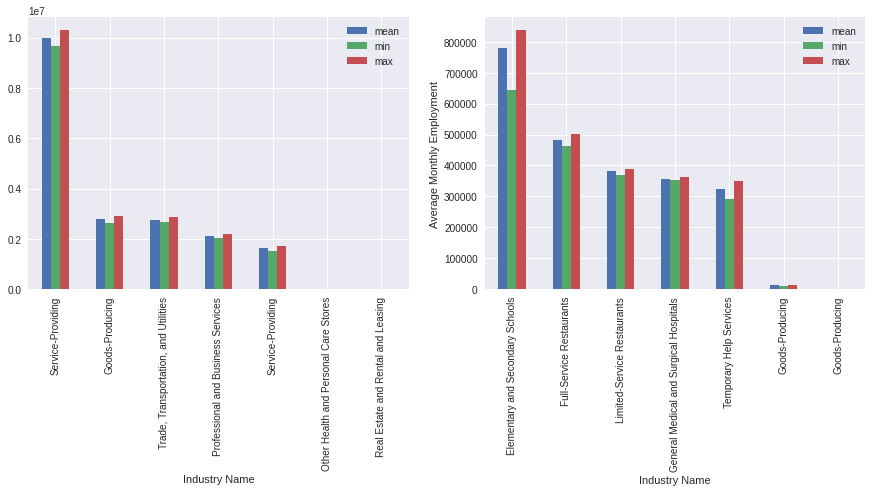

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
avg_employment_sector_top.plot.bar(x='Industry Name',ax=axs[0])
plt.ylabel('Average Monthly Employment')
avg_employment_top.plot.bar(x='Industry Name', y=['mean','min','max'] ,ax=axs[1])
plt.ylabel('Average Monthly Employment')
plt.show()

The top graph represents average monthly employment in California across all the years based on industries. Service producing industries across all years has produced highest average monthly employment of 10,869,770 compared to Goods. Among service producing services, trade transportation and utilities is highest performing service in terms of employment 
(2,830,817), followed by Professional and Business service like accounting and legal services which have up to 2,338,327 level of employment.

The bottom graph represents same information as above but it breaks it down to more specific industries. Elemenatry and Secondary Schools as part of service producing industries offer the highest level of employment on average across all years, followed by Full-service restaurants. 

## Prediction of salaries and how it has changed over the years based on industries and finding average monthly wages for different industries in California

In [ ]:
qcew_avg_salary = ca_qcew.groupby(['Industry Name'])['Average Weekly Wages'].agg(['mean', 'min', 'max']).reset_index().sort_values(by=['mean'],ascending = False)
qcew_avg_salary.head(5)

,Industry Name,mean,min,max
1235,Portfolio Management,4064.9,2767.0,5626.0
639,Independent Artists/Writers/Performers,3799.9,2249.0,7665.0
678,Investment Banking & Securities Dealing,3663.2,2576.0,6268.0
825,Miscellaneous Intermediation,3571.2,2462.0,4865.0
1030,Other Financial Investment Activities,3330.5,2548.0,4241.0


In [ ]:
qcew_avg_year_salary = ca_qcew.groupby(['Industry Name','Year'])['Average Weekly Wages'].agg(['mean', 'min', 'max']).reset_index().sort_values(by=['Year','mean'],ascending = False)
qcew_avg_year_salary.head(5)

,Industry Name,Year,mean,min,max
2446,Portfolio Management,2005,4246.2,2910.0,5626.0
3191,Web Search Portals,2005,3794.2,2925.0,5077.0
1345,Investment Banking & Securities Dealing,2005,3729.2,2665.0,6189.0
1268,Independent Artists/Writers/Performers,2005,3701.6,2249.0,7665.0
1637,Miscellaneous Intermediation,2005,3600.6,2804.0,4461.0


In [ ]:
new_df = qcew_avg_year_salary.head(2)
new_df = new_df.append(qcew_avg_year_salary.tail(2))
new_df

,Industry Name,Year,mean,min,max
2446,Portfolio Management,2005,4246.2,2910.0,5626.0
3191,Web Search Portals,2005,3794.2,2925.0,5077.0
878,Ethyl Alcohol Manufacturing,2004,0.0,0.0,0.0
2337,Peanut Farming,2004,0.0,0.0,0.0


There's 1752 industries data and they are sorted per year basis. Based on above data top 2 industries with average mean salary  for the year 2021 are All Other Information Services	, Other Traveler Accommodation. In contrast,Ethyl Alcohol Manufacturing	and Peanut Farming has not been able to generate any employment.
With this we will see if there's any relationship between number of employment in a particular sector and average salary. 


We will use scaling to bring the independent variables and dependent variables to the same scale. Currently average weekly wages is measured in temrs of dollars in thousands and the establishments is a highly varying number from one to seven digits. Average monthly employment is also measured in number of jobs on a different scale.


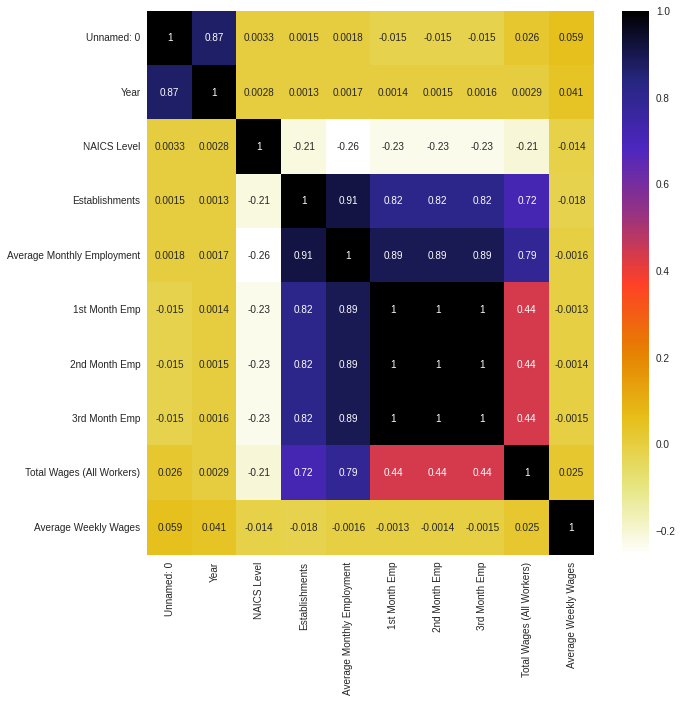

In [ ]:
plt.figure(figsize=(10,10))
cor = ca_qcew.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

Based on the correlation matrix above we have week correation between average weekly wages and average monthly employment. However physical location of employment i.e. eatablshment column has high influence

In [ ]:
enc = OrdinalEncoder()
ca_qcew[['Ownership_enc']] = enc.fit_transform(ca_qcew[['Ownership']])

In [ ]:
scaled_ca_qcew = ca_qcew[['Establishments','Average Weekly Wages','Average Monthly Employment']]
scaler = StandardScaler()
standard_df = scaler.fit_transform(scaled_ca_qcew)
standard_df = pd.DataFrame(standard_df)

In [ ]:
train_wage, test_wage = train_test_split(standard_df, test_size=0.3, random_state=42)
X_train_wage = train_wage[[0,2]]
y_train_wage = train_wage[1]
X_test_wage = test_wage[[0,2]]
y_test_wage = test_wage[1]
reg_wage = linear_model.LinearRegression()
reg_wage.fit(X_train_wage, y_train_wage)

print("Training Accuracy: ",reg_wage.score(X_train_wage, y_train_wage) * 100)
print("Test Accuracy: ",reg_wage.score(X_test_wage, y_test_wage) * 100)

Training Accuracy:  0.17657228654182067
Test Accuracy:  0.1448234566932216


It can be shown in the model we have 0.1% accuracy to predict wages with monthly employment. However, we know that salary has seen an upward trend so it may have an impact to employment.

In [ ]:
train1, test1 = train_test_split(standard_df, test_size=0.3, random_state=42)
X_train1 = train1[[0,1]]
y_train1 = train1[2]
X_test1 = test1[[0,1]]
y_test1 = test1[2]
reg1 = linear_model.LinearRegression()
reg1.fit(X_train1, y_train1)

print("Training Accuracy: ",reg1.score(X_train1, y_train1) * 100)
print("Test Accuracy: ",reg1.score(X_test1, y_test1) * 100)

Training Accuracy:  85.22146976548683
Test Accuracy:  77.30735635924904


In [ ]:
reg_pred1 = reg1.predict(X_test1)
mse1 = mean_squared_error(y_test1, reg_pred1)
r21 = r2_score(y_test1, reg_pred1)
print("MSE:", mse1)
print("R Squared:", r21)

MSE: 0.14788619573715042
R Squared: 0.7730735635924902


In [ ]:

ca_qcew_establishments = scaled_ca_qcew[['Establishments','Average Monthly Employment']]

train, test = train_test_split(ca_qcew_establishments, test_size=0.3, random_state=42)

X_train = train[['Establishments']]
y_train = train['Average Monthly Employment']
X_test = test[['Establishments']]
y_test = test['Average Monthly Employment']

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


# accuracy
print("Training Accuracy: ",reg.score(X_train, y_train) * 100)
print("Test Accuracy: ",reg.score(X_test, y_test) * 100)


Training Accuracy:  85.20043542345418
Test Accuracy:  77.2781382395635


In [ ]:
reg_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 28585421525.06138
R Squared: 0.7727813823956351


Based on the correlation there's no direct relatioship between average monthly employment and Average weekly wages. However, the establishment has stronger influence over Average Monthly Employment relative to other independent variables. In addition, Ownership has some influcence on Average Monthly Employment. Furthermore, there's no significant influence of Average Weekly Wages and ownership on Average montly Employment.

## Trends in Employment levels and wages since 2004 in Californa

In [ ]:
ca_qcew_yearly_salary = ca_qcew.groupby(['Year'])['Average Weekly Wages'].mean().reset_index()

,Year,Average Weekly Wages
0,2004,860.737220
1,2005,902.739446


In [43]:
 ca_ces_employment = ca_ces.groupby(['Year'])['Current Employment'].sum().reset_index()
 ca_ces_employment = ca_ces_employment.apply(lambda x: x)

In [ ]:
df_merge_col = pd.merge(ca_qcew_yearly_salary, ca_ces_employment, on='Year')
print(df_merge_col.shape)
df_merge_col.head(3)

(2, 3)


,Year,Average Weekly Wages,Current Employment
0,2004,860.737220,3811200
1,2005,902.739446,17978500


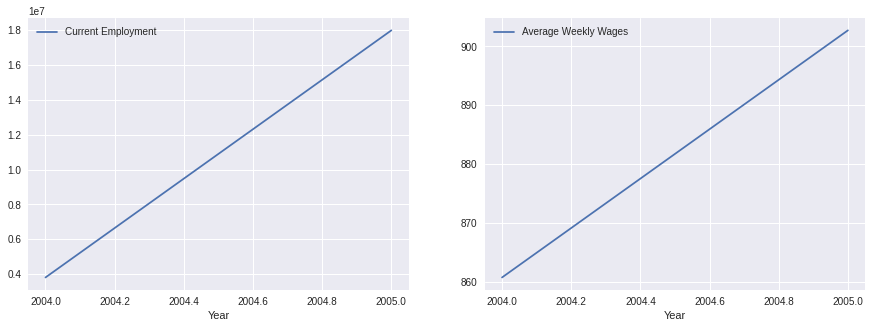

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
df_merge_col.plot.line(x= "Year",y ="Current Employment", ax=axs[0])
df_merge_col.plot.line(x= "Year",y ="Average Weekly Wages", ax=axs[1])
plt.show()

### Observations
##### We can clearly observe that over the provided time period,the current employment has increased before experiencing a major decline in 2019(due to Covid-19).Also a small drop in employment can be noticed in 2007(Great recession[2007-2009])can be seen and then rising again till 2019. 
##### On the other hand,in case of Average Weekly Wages, a uniform rise over the provided time period can be seen reaching the highest mark in 2021.

## Potential of Employment based on Ownership Structure in California

In [ ]:
# dropping unnecessary columns
ca_qcew_gov = ca_qcew.loc[(ca_qcew['Ownership']!= 'Total Covered') & (ca_qcew['Ownership']!= 'Total Government')]

In [ ]:
ca_qcew_gov_private = ca_qcew_gov.loc[ca_qcew_gov['Ownership']=='Private']
ca_qcew_gov_federal = ca_qcew_gov.loc[ca_qcew_gov['Ownership']=='Federal Government']
ca_qcew_gov_local = ca_qcew_gov.loc[ca_qcew_gov['Ownership']=='Local Government']
ca_qcew_gov_state = ca_qcew_gov.loc[ca_qcew_gov['Ownership']=='State Government']

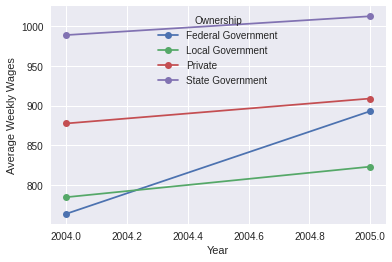

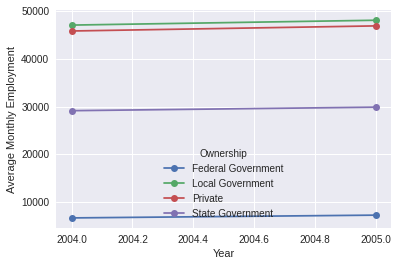

In [ ]:
ca_qcew_gov.pivot_table('Average Weekly Wages', "Year", "Ownership").plot(marker="o")
plt.ylabel('Average Weekly Wages')
ca_qcew_gov.pivot_table('Average Monthly Employment', "Year", "Ownership").plot(marker="o")
plt.ylabel('Average Monthly Employment')
plt.show()

### Observations
##### There is no doubt that Average weekly wages have almost doubled under the ownership of Private and State Government, while it has also increased in case of Local and Federal government fluctuating along the way.
##### The Average Monthly Employment has been least under the ownership of Federal government and has remained almost same over time,while under the private ownership,average monthly employment has been the highest.The Local and State government accounted for almost same average monthly employment as recorded in early years.

In [ ]:

ca_qcew_gov_private_Q1 = ca_qcew_gov_private['Average Weekly Wages'].quantile(0.25)
ca_qcew_gov_private_Q3 = ca_qcew_gov_private['Average Weekly Wages'].quantile(0.75)
ca_qcew_gov_private_IQR = ca_qcew_gov_private_Q3 - ca_qcew_gov_private_Q1
ca_qcew_gov_federal_Q1 = ca_qcew_gov_federal['Average Weekly Wages'].quantile(0.25)
ca_qcew_gov_federal_Q3 = ca_qcew_gov_federal['Average Weekly Wages'].quantile(0.75)
ca_qcew_gov_federal_IQR = ca_qcew_gov_federal_Q3 - ca_qcew_gov_federal_Q1
ca_qcew_gov_local_Q1 = ca_qcew_gov_local['Average Weekly Wages'].quantile(0.25)
ca_qcew_gov_local_Q3 = ca_qcew_gov_local['Average Weekly Wages'].quantile(0.75)
ca_qcew_gov_local_IQR = ca_qcew_gov_local_Q3 - ca_qcew_gov_local_Q1
ca_qcew_gov_state_Q1 = ca_qcew_gov_state['Average Weekly Wages'].quantile(0.25)
ca_qcew_gov_state_Q3 = ca_qcew_gov_state['Average Weekly Wages'].quantile(0.75)
ca_qcew_gov_state_IQR = ca_qcew_gov_state_Q3 - ca_qcew_gov_state_Q1

In [ ]:
ca_qcew_gov_private_clean = ca_qcew_gov_private.loc[(ca_qcew_gov_private['Average Weekly Wages'] >= ca_qcew_gov_private_Q1) & (ca_qcew_gov_private['Average Weekly Wages'] <= ca_qcew_gov_private_Q3)]
ca_qcew_gov_federal_clean = ca_qcew_gov_federal.loc[(ca_qcew_gov_federal['Average Weekly Wages'] >= ca_qcew_gov_federal_Q1) & (ca_qcew_gov_federal['Average Weekly Wages'] <= ca_qcew_gov_federal_Q3)]
ca_qcew_gov_local_clean = ca_qcew_gov_local.loc[(ca_qcew_gov_local['Average Weekly Wages'] >= ca_qcew_gov_local_Q1) & (ca_qcew_gov_local['Average Weekly Wages'] <= ca_qcew_gov_local_Q3)]
ca_qcew_gov_state_clean = ca_qcew_gov_state.loc[(ca_qcew_gov_state['Average Weekly Wages'] >= ca_qcew_gov_state_Q1) & (ca_qcew_gov_state['Average Weekly Wages'] <= ca_qcew_gov_state_Q3)]

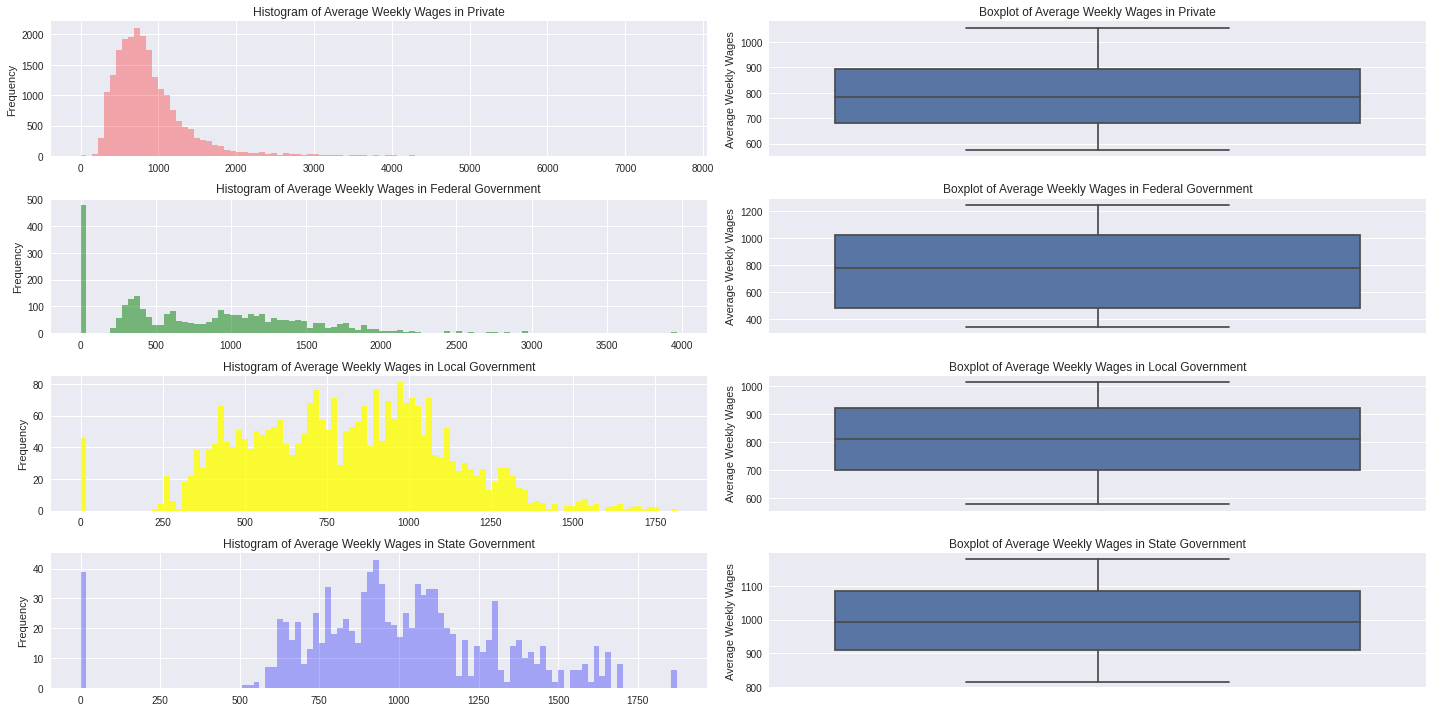

In [ ]:
fig, axs = plt.subplots(4, 2,figsize=(20,10))
#Plot for Average Weekly Wages in Private
ca_qcew_gov_private['Average Weekly Wages'].plot.hist(bins=100, alpha=0.3,color='red',ax=axs[0,0])
sns.boxplot(y="Average Weekly Wages",data=ca_qcew_gov_private_clean,ax=axs[0,1])
axs[0,1].set_title('Boxplot of Average Weekly Wages in Private')
axs[0,0].set_title('Histogram of Average Weekly Wages in Private')
#print('\n')


#Plot for Average Weekly Wages in Federal Government
ca_qcew_gov_federal['Average Weekly Wages'].plot.hist(bins=100, alpha=0.5,color='green',ax=axs[1,0])
sns.boxplot(y="Average Weekly Wages",data=ca_qcew_gov_federal_clean,ax=axs[1,1])
axs[1,1].set_title('Boxplot of Average Weekly Wages in Federal Government')
axs[1,0].set_title('Histogram of Average Weekly Wages in Federal Government')


#Plot for Average Weekly Wages in Local Government
ca_qcew_gov_local['Average Weekly Wages'].plot.hist(bins=100, alpha=0.8,color='yellow',ax=axs[2,0])
sns.boxplot(y="Average Weekly Wages",data=ca_qcew_gov_local_clean,ax=axs[2,1])
axs[2,1].set_title('Boxplot of Average Weekly Wages in Local Government')
axs[2,0].set_title('Histogram of Average Weekly Wages in Local Government')

#Plot for Average Weekly Wages in State Government
ca_qcew_gov_state['Average Weekly Wages'].plot.hist(bins=100, alpha=0.3,color='blue',ax=axs[3,0])
sns.boxplot(y="Average Weekly Wages",data=ca_qcew_gov_state_clean,ax=axs[3,1])
axs[3,1].set_title('Boxplot of Average Weekly Wages in State Government')
axs[3,0].set_title('Histogram of Average Weekly Wages in State Government')
fig.tight_layout()


In [ ]:
print(ttest_ind(ca_qcew_gov_private_clean['Average Weekly Wages'], ca_qcew_gov_state_clean['Average Weekly Wages']))
print(ttest_ind(ca_qcew_gov_private_clean['Average Weekly Wages'], ca_qcew_gov_federal_clean['Average Weekly Wages']))
print(ttest_ind(ca_qcew_gov_private_clean['Average Weekly Wages'], ca_qcew_gov_local_clean['Average Weekly Wages']))

Ttest_indResult(statistic=-34.63105626474097, pvalue=4.731675895284449e-250)
Ttest_indResult(statistic=5.522943459147665, pvalue=3.400752359255934e-08)
Ttest_indResult(statistic=-3.678898040037486, pvalue=0.00023524018829678775)


* Since boxplots seem to have equal variances and histogram appears to be normal so Assumptions is said to be satisfied.


 * P value for all the match is < 0.05
 
 * Since P value is less we reject null hypothesis. That means there's no not enough evidence t suggest that average weekly wages across the sector is similar.


In [ ]:
le = preprocessing.LabelEncoder()
qcew['Ownership']=le.fit_transform(qcew['Ownership'])

In [ ]:
X=qcew[['Year','NAICS Level','Establishments','Average Monthly Employment','1st Month Emp','2nd Month Emp','3rd Month Emp','Total Wages (All Workers)','Average Weekly Wages']]
y=qcew['Ownership']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Clustering: Employment and average salary according to different areas within California for the most recent year

In [ ]:
ca_private_df = ca_qcew_gov_private_clean[['Average Monthly Employment', 'Average Weekly Wages']]
ca_federal_df = ca_qcew_gov_federal_clean[['Average Monthly Employment', 'Average Weekly Wages']]
ca_local_df = ca_qcew_gov_local_clean[['Average Monthly Employment', 'Average Weekly Wages']]
ca_state_df = ca_qcew_gov_state_clean[['Average Monthly Employment', 'Average Weekly Wages']]

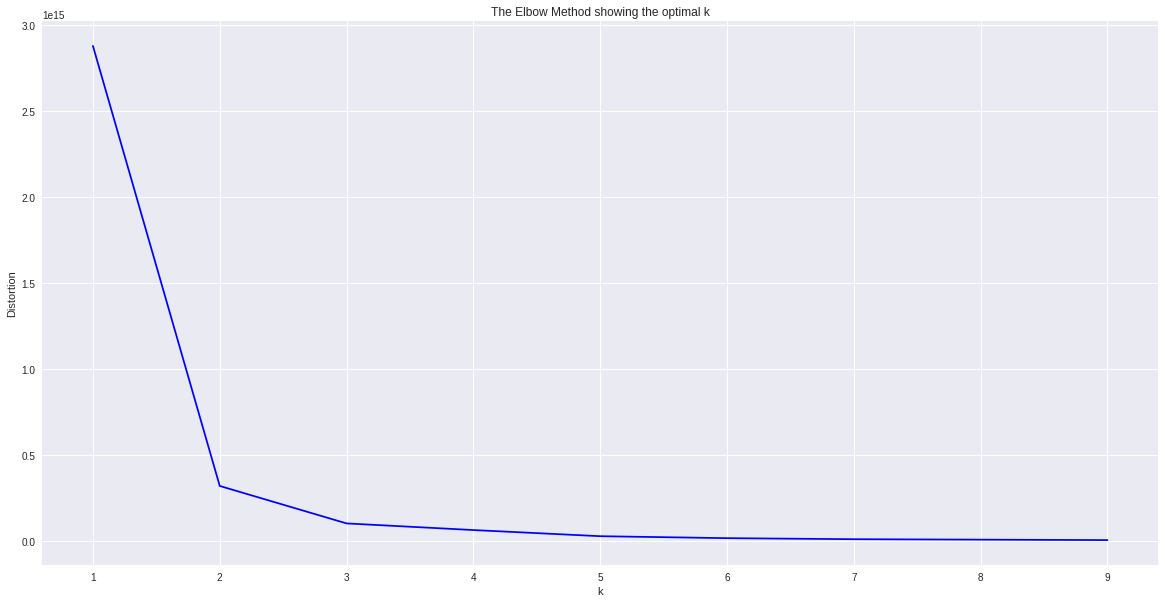

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ca_private_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the above elbow method, we can select k = 2 clusters. Since the variables for clustering are the same for each ownership structure, we will select k =2  for all sectors including private, federal, state and local governments. 

In [ ]:
scalar = MinMaxScaler()
scalar.fit(ca_private_df[['Average Weekly Wages']])
ca_private_df['Average Weekly Wages']= scalar.transform(ca_private_df[['Average Weekly Wages']])

scalar.fit(ca_private_df[['Average Monthly Employment']])
ca_private_df['Average Monthly Employment']= scalar.transform(ca_private_df[['Average Monthly Employment']])
ca_private_df

#

scalar.fit(ca_federal_df[['Average Weekly Wages']])
ca_federal_df['Average Weekly Wages']= scalar.transform(ca_federal_df[['Average Weekly Wages']])

scalar.fit(ca_federal_df[['Average Monthly Employment']])
ca_federal_df['Average Monthly Employment']= scalar.transform(ca_federal_df[['Average Monthly Employment']])
ca_federal_df

#
scalar.fit(ca_state_df[['Average Weekly Wages']])
ca_state_df['Average Weekly Wages']= scalar.transform(ca_state_df[['Average Weekly Wages']])

scalar.fit(ca_state_df[['Average Monthly Employment']])
ca_state_df['Average Monthly Employment']= scalar.transform(ca_state_df[['Average Monthly Employment']])
ca_state_df
#
scalar.fit(ca_local_df[['Average Weekly Wages']])
ca_local_df['Average Weekly Wages']= scalar.transform(ca_local_df[['Average Weekly Wages']])

scalar.fit(ca_local_df[['Average Monthly Employment']])
ca_local_df['Average Monthly Employment']= scalar.transform(ca_local_df[['Average Monthly Employment']])


In [ ]:
km = KMeans(n_clusters = 2)
private_model = km.fit(ca_private_df)
federal_model = km.fit(ca_federal_df)
state_model = km.fit(ca_state_df)
local_model = km.fit(ca_local_df)

y_private=km.fit_predict(ca_private_df)
y_federal=km.fit_predict(ca_federal_df)
y_state=km.fit_predict(ca_state_df)
y_local=km.fit_predict(ca_local_df)


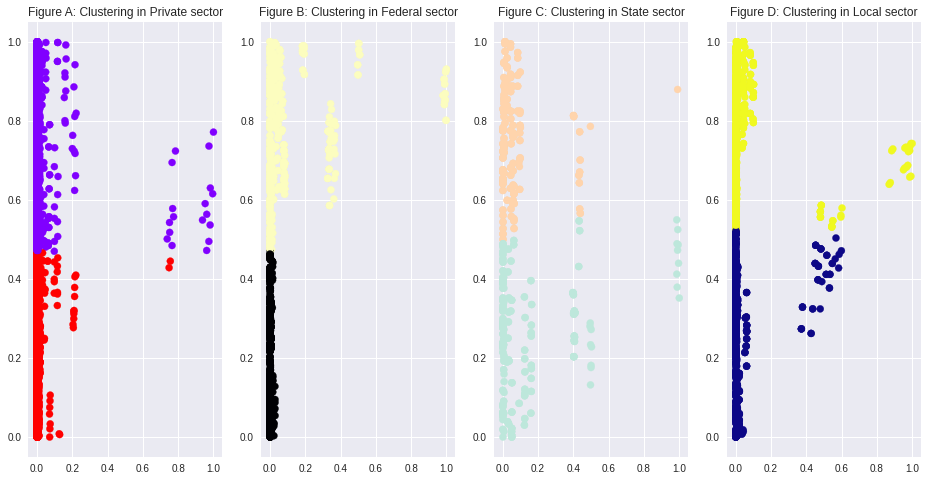

In [ ]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (16,8))
ax1.scatter(ca_private_df['Average Monthly Employment'], ca_private_df['Average Weekly Wages'], c=y_private, s=50, cmap='rainbow')
ax1.title.set_text('Figure A: Clustering in Private sector')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})


ax2.scatter(ca_federal_df['Average Monthly Employment'], ca_federal_df['Average Weekly Wages'], c=y_federal, s=50, cmap='magma')
ax2.title.set_text('Figure B: Clustering in Federal sector')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

ax3.scatter(ca_state_df['Average Monthly Employment'], ca_state_df['Average Weekly Wages'], c=y_state, s=50, cmap='icefire')
ax3.title.set_text('Figure C: Clustering in State sector')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

ax4.scatter(ca_local_df['Average Monthly Employment'], ca_local_df['Average Weekly Wages'], c=y_local, s=50, cmap='plasma')
ax4.title.set_text('Figure D: Clustering in Local sector')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})


From above, we can see that with k =2, both clusters are distinguishable for each of the ownership sectors in California. 

In Figure A, the blue cluster represents industries in private sector have low to high employment opportunities but generally have lower weekly wages compared to industries in the red cluster. 

Figure B shows two different clusters in the Federal Government sector. The black cluster highlight jobs with lower average monthly employment and low weekly wages relative to the yellow cluster. The yellow cluster include jobs in the federal sector with low to high employment opporunities but offer higher wages than all jobs in the black cluster. 

In Figure C, both green and orange clusters include industries in the State level sector with low-high employment opportunities. However the green cluster is seperated from orange because of lower average weekly wages.

Figure D is similar to C where in the local government sector, both clusters include industries with low-to high employment opportunities but blue clusters offers higher average weekly wages than the yellow cluster. 


## Conclusion

* Average weekly wages have increased over the year but recently employment levels have decreased due to the pandemoc. 
* Establishments or the physical place of work has a high degree of influence in predicting monthly employment State Government has consistently had the highest weekly wages throughout the years, followed by the private sector. 
The private sector has produced most employment opportunities every month over the recent years out all of sectors. 
* By conducting a two-sample t test, we found that there is a statistical and practical difference between the wages of private workers compared with other ownership sectors. 
* For each of the ownership sectors, we were able to cluster them into two groups and see differences between two clusters in terms of average weekly wages and average monthly employment. 


